In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import csv 
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

/Users/pramod_mulagala/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
amaz_df = pd.read_csv('Reviews.csv') 
display(amaz_df)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


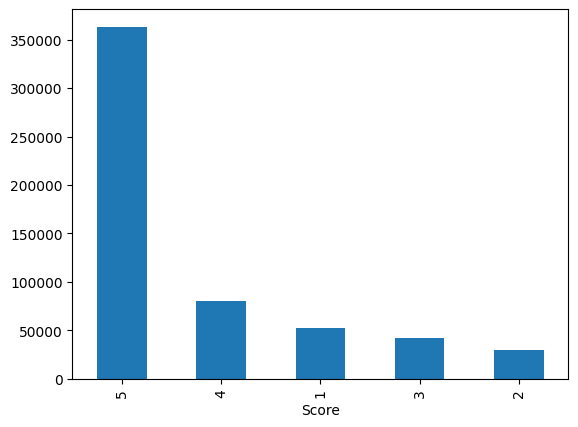

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = amaz_df['Score'].value_counts()
value_counts.plot(kind='bar')
plt.show()

In [4]:
amaz_df.shape

(568454, 10)

In [5]:
amaz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
amaz_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
amaz_df.drop_duplicates()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [8]:
def punctuation_removal(bad_str):
    translate = str.maketrans('', '', string.punctuation)
    good_str = bad_str.translate(translate)
    return good_str

amaz_df['Text'] = amaz_df['Text'].apply(punctuation_removal)

In [9]:
def drop_num(text):
    text_new = [i for i in text if not re.search(r'\d', i)]
    return ''.join(text_new)

amaz_df['Text'] = amaz_df['Text'].apply(drop_num)


In [10]:
def remove_accented_chars(text):
    good_text = unicodedata.normalize('NFKD', text)
    ascii = ''.join([char for char in good_text if not unicodedata.combining(char)])
    return ascii

amaz_df['Text'] = amaz_df['Text'].apply(lambda x: remove_accented_chars(x))

In [11]:
def remove_splchars(text):
    pattern = r'[^a-zA-Z0-9]'
    neat_text = re.sub(pattern, ' ', text)
    return neat_text

amaz_df['Text'] = amaz_df['Text'].apply(lambda x: remove_splchars(x))

In [12]:
amaz_df['Text'][:10]

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price  There was a wide...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good  It is very soft and che...
8    Right now Im mostly just sprouting this so my ...
9    This is a very healthy dog food Good for their...
Name: Text, dtype: object

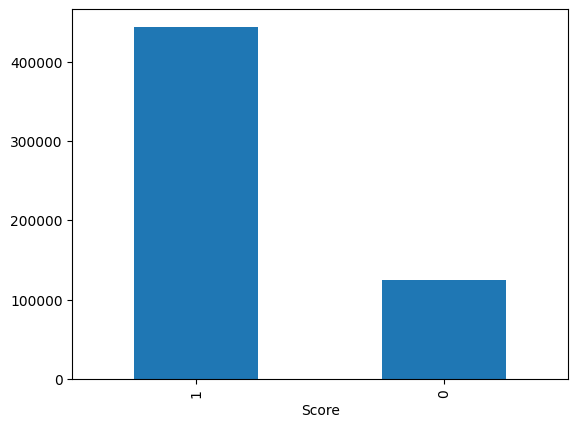

In [13]:
amaz_df['Score'] = amaz_df['Score'].apply(lambda x : 1 if x > 3 else 0)
value_counts = amaz_df['Score'].value_counts()
value_counts.plot(kind='bar')
plt.show()

In [14]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(amaz_df['Text'])
X = tokenizer.texts_to_sequences(amaz_df['Text'])
X = pad_sequences(X,padding='post',truncating='post',maxlen=500)

In [15]:
X =  np.array(X)
y = np.array(amaz_df['Score'].values)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train = X_train[:10000]
y_train = y_train[:10000]

In [18]:
# Creating a Sequential model
model = Sequential()

# Adding an embedding layer using the following parameters: Input length 500, embedding dimension 32, vocabulary size 7000.
model.add(Embedding(input_dim=7000, output_dim=32, input_length=500))

# Including a 1D Convolutional layer with the same padding, ReLU activation, kernel size of 3, and 32 filters.
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))

# Specifying pool size two for the MaxPooling layer.
model.add(MaxPooling1D(pool_size=2))

# ReLU activation, a kernel size of 3, and 64 filters make up the additional 1D Convolutional layer.
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Adding a second MaxPooling layer with a two-pool pool
model.add(MaxPooling1D(pool_size=2))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Adding a fully connected Dense layer with 128 units and ReLU activation
model.add(Dense(units=128, activation='relu'))

# Adding another fully connected Dense layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu'))

# Adding the final output layer with 1 unit and a sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model with binary cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           224000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 248, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 124, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 7936)              0

In [20]:
model_history  = model.fit(X_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.4755 - accuracy: 0.7901 - val_loss: 0.3891 - val_accuracy: 0.8185
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3520 - accuracy: 0.8409 - val_loss: 0.3632 - val_accuracy: 0.8305
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3079 - accuracy: 0.8648 - val_loss: 0.3554 - val_accuracy: 0.8360
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.2703 - accuracy: 0.8849 - val_loss: 0.3636 - val_accuracy: 0.8375
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.2389 - accuracy: 0.9019 - val_loss: 0.3977 - val_accuracy: 0.8330
Epoch 6/10
250/250 [==============================] - 2s 9ms/step - loss: 0.1883 - accuracy: 0.9254 - val_loss: 0.4961 - val_accuracy: 0.8325
Epoch 7/10
250/250 [==============================] - 2s 9ms/step - loss: 0.1229 - accuracy: 0.9570 - val_loss: 0.5535 - val_accuracy: 0.8265
Epoch 

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3553/3553 [==============================] - 8s 2ms/step - loss: 0.8461 - accuracy: 0.8090
Test Accuracy: 80.90%


In [22]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
RandomForestClassifier(random_state=42)
model.score(X_test,y_test)

0.7904583476264612

In [23]:
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7846355472288924

In [24]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7761476282203517